<a href="https://colab.research.google.com/github/Ilyaas189/LAb-03-Bank_Classification/blob/main/Lab_03_Bank_Classification_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bank Classification**

**Loading the dataset**

In [2]:
import pandas as pd

dataset = pd.read_csv("bank-additional-full.csv",sep = ';')

In [ ]:
dataset.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
dataset2 = dataset.dropna()

In [5]:
dataset2.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


**Encoding the Labels**

In [6]:
from sklearn.preprocessing import LabelEncoder
dataset = dataset.apply(LabelEncoder().fit_transform)

**To convert the dataset into dummy dataset**

In [7]:
df_dummies = pd.get_dummies(dataset)

In [8]:
df_dummies.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.000000,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,23.023623,3.72458,1.172769,3.747184,0.208872,1.071720,0.327425,0.365252,4.230868,2.004613,255.084976,1.566840,25.264737,0.172963,0.930101,6.588521,14.196489,10.335656,255.634821,7.845829,0.112654
std,10.418993,3.59456,0.608902,2.136482,0.406686,0.985314,0.723616,0.481507,2.320025,1.397575,238.907418,2.758711,3.832685,0.494901,0.362886,2.797902,5.560136,5.978930,68.665954,2.454812,0.316173
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.00000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,102.000000,0.000000,26.000000,0.000000,1.000000,3.000000,10.000000,6.000000,214.000000,6.000000,0.000000
50%,21.000000,2.00000,1.000000,3.000000,0.000000,2.000000,0.000000,0.000000,4.000000,2.000000,180.000000,1.000000,26.000000,0.000000,1.000000,8.000000,14.000000,8.000000,287.000000,8.000000,0.000000
75%,30.000000,7.00000,2.000000,6.000000,0.000000,2.000000,0.000000,1.000000,6.000000,3.000000,319.000000,2.000000,26.000000,0.000000,1.000000,9.000000,18.000000,16.000000,305.000000,10.000000,0.000000
max,77.000000,11.00000,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,9.000000,4.000000,1543.000000,41.000000,26.000000,7.000000,2.000000,9.000000,25.000000,25.000000,315.000000,10.000000,1.000000


**To drop the column of 'duration'**

In [9]:
df_dummies = df_dummies.drop('duration',axis = 1)

**To drop the rows with empty values**

In [10]:
df_dummies = df_dummies.dropna()

In [11]:
df_dummies.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.000000,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,23.023623,3.72458,1.172769,3.747184,0.208872,1.071720,0.327425,0.365252,4.230868,2.004613,1.566840,25.264737,0.172963,0.930101,6.588521,14.196489,10.335656,255.634821,7.845829,0.112654
std,10.418993,3.59456,0.608902,2.136482,0.406686,0.985314,0.723616,0.481507,2.320025,1.397575,2.758711,3.832685,0.494901,0.362886,2.797902,5.560136,5.978930,68.665954,2.454812,0.316173
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.00000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,26.000000,0.000000,1.000000,3.000000,10.000000,6.000000,214.000000,6.000000,0.000000
50%,21.000000,2.00000,1.000000,3.000000,0.000000,2.000000,0.000000,0.000000,4.000000,2.000000,1.000000,26.000000,0.000000,1.000000,8.000000,14.000000,8.000000,287.000000,8.000000,0.000000
75%,30.000000,7.00000,2.000000,6.000000,0.000000,2.000000,0.000000,1.000000,6.000000,3.000000,2.000000,26.000000,0.000000,1.000000,9.000000,18.000000,16.000000,305.000000,10.000000,0.000000
max,77.000000,11.00000,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,9.000000,4.000000,41.000000,26.000000,7.000000,2.000000,9.000000,25.000000,25.000000,315.000000,10.000000,1.000000


**Displaying the bar graph of the dataset**

In [ ]:
df_dummies.plot(kind = 'bar')

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f05a66cf290> (for post_execute):


KeyboardInterrupt: ignored

**To split the Features and Labels**

In [12]:
X = df_dummies.iloc[:,:-1]
y = df_dummies.iloc[:,-1]

In [23]:
len(X.columns)

19

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             41188 non-null  int64
 1   job             41188 non-null  int64
 2   marital         41188 non-null  int64
 3   education       41188 non-null  int64
 4   default         41188 non-null  int64
 5   housing         41188 non-null  int64
 6   loan            41188 non-null  int64
 7   contact         41188 non-null  int64
 8   month           41188 non-null  int64
 9   day_of_week     41188 non-null  int64
 10  campaign        41188 non-null  int64
 11  pdays           41188 non-null  int64
 12  previous        41188 non-null  int64
 13  poutcome        41188 non-null  int64
 14  emp.var.rate    41188 non-null  int64
 15  cons.price.idx  41188 non-null  int64
 16  cons.conf.idx   41188 non-null  int64
 17  euribor3m       41188 non-null  int64
 18  nr.employed     41188 non-

In [57]:
len(X.columns)

19

In [55]:
for i in X.columns:
  print(i,X[i].unique())

age [39 40 20 23 28 42 24  7  8 12 18 37 29 33 22 13 38 32 17 35 41 15 21 27
 25 43 36 30 34 31 16 14 26 19 11 10  9  5  6  3  4 44  2  1 53 49 59 50
 56 71 76 60 51 58 46 63 45 48 55 65 47 54 52 61 68 62 66 64 57  0 70 73
 69 77 75 67 74 72]
job [ 3  7  0  1  9  5  4 10  6 11  2  8]
marital [1 2 0 3]
education [0 3 1 2 5 7 6 4]
default [0 1 2]
housing [0 2 1]
loan [0 2 1]
contact [1 0]
month [6 4 3 1 8 7 2 5 0 9]
day_of_week [1 3 4 2 0]
campaign [ 0  1  2  3  4  5  6  7  8  9 10 11 12 18 17 22 13 21 24 15 16 14 19 41
 36 34 39 27 25 26 31 20 23 28 30 29 38 35 37 32 33 40]
pdays [26  6  4  3  5  1  0 10  7  8  9 11  2 12 13 14 15 16 21 17 18 22 23 24
 19 25 20]
previous [0 1 2 3 4 5 6 7]
poutcome [1 0 2]
emp.var.rate [8 9 7 6 3 2 0 1 4 5]
cons.price.idx [18 23 17 13 15 11  6  7 10  8  9  3  0  1  2  4  5 12 14 16 20 22 19 21
 24 25]
cons.conf.idx [16  8  6 17 10  7  5  1  3  4  9 20 22 24 25 23 21 18 19 12 13 11 14 15
  2  0]
euribor3m [287 286 285 289 290 288 291 292 293 311 305 303 3

In [27]:
print(len(y))

41188


In [28]:
import numpy as np
u, c =np.unique(y, return_counts=True)
dict(zip(u,c))

{0: 36548, 1: 4640}

**Splitting the Train and Test data with 80/20 ratio**

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=50)

**Checking the shape for the model**

In [30]:
print("X_train:",X_train.shape,"y_train",y_train.shape)
print("X_test:",X_test.shape,"y_test",y_test.shape)

X_train: (32950, 19) y_train (32950,)
X_test: (8238, 19) y_test (8238,)


**Model Evaluation metrics selection for scores - I selected f1_macro** 

In [31]:
from sklearn.metrics import SCORERS
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

**Cross Validation of the model - With RandomForest Classifier**

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(100,max_depth=8, random_state=60)

scores = cross_val_score(clf,X_train,y_train,cv = 10,scoring='f1_macro')

**Displaying the accuracy of the model**

In [54]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.64 accuracy with a standard deviation of 0.01


In [38]:
from sklearn.metrics import SCORERS
print(SCORERS)

{'explained_variance': make_scorer(explained_variance_score), 'r2': make_scorer(r2_score), 'max_error': make_scorer(max_error, greater_is_better=False), 'neg_median_absolute_error': make_scorer(median_absolute_error, greater_is_better=False), 'neg_mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False), 'neg_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False), 'neg_mean_squared_log_error': make_scorer(mean_squared_log_error, greater_is_better=False), 'neg_root_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False, squared=False), 'neg_mean_poisson_deviance': make_scorer(mean_poisson_deviance, greater_is_better=False), 'neg_mean_gamma_deviance': make_scorer(mean_gamma_deviance, greater_is_better=False), 'accuracy': make_scorer(accuracy_score), 'roc_auc': make_scorer(roc_auc_score, needs_threshold=True), 'roc_auc_ovr': make_scorer(roc_auc_score, needs_proba=True, multi_class=ovr), 'roc_auc_ovo': make_scorer(roc_auc_

**Comparison with the Dummy Classifier**

In [39]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

dummy_clf.score(X_test, y_test)

0.8846807477543093

**Employing Grid Searching to obtain the optimized values of Hyper Parameters of the RandomForest Classifier**

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'max_depth': [1, 10, 100, 1000],
              'min_samples_split': [2,3,4,5], 
              'min_samples_leaf': [1, 2, 3, 4],
              } 
  
grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2 ............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, score=0.888, total=   0.5s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2 ............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, score=0.888, total=   0.4s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2 ............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, score=0.888, total=   0.5s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, score=0.888, total=   0.4s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, score=0.888, total=   0.5s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=3 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=3, score=0.888, total=   0.5s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=3 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=3, score=0.888, total=   0.4s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=3 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=3, score=0.888, total=   0.5s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=3 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_s

[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:  8.2min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

**Printing the optimum values of Hyper Parameters**

In [41]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 3}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


**Grid Search model Prediction**

In [42]:
from sklearn.metrics import classification_report
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7288
           1       0.64      0.26      0.37       950

    accuracy                           0.90      8238
   macro avg       0.78      0.62      0.66      8238
weighted avg       0.88      0.90      0.88      8238



**Accuracy Scores for the test data**

In [43]:
from sklearn.metrics import accuracy_score  
accuracy_score(y_test, grid_predictions)

0.8979121145909201

**Plotting of the festures importance**

Text(0.5, 0, 'Relative Importance')

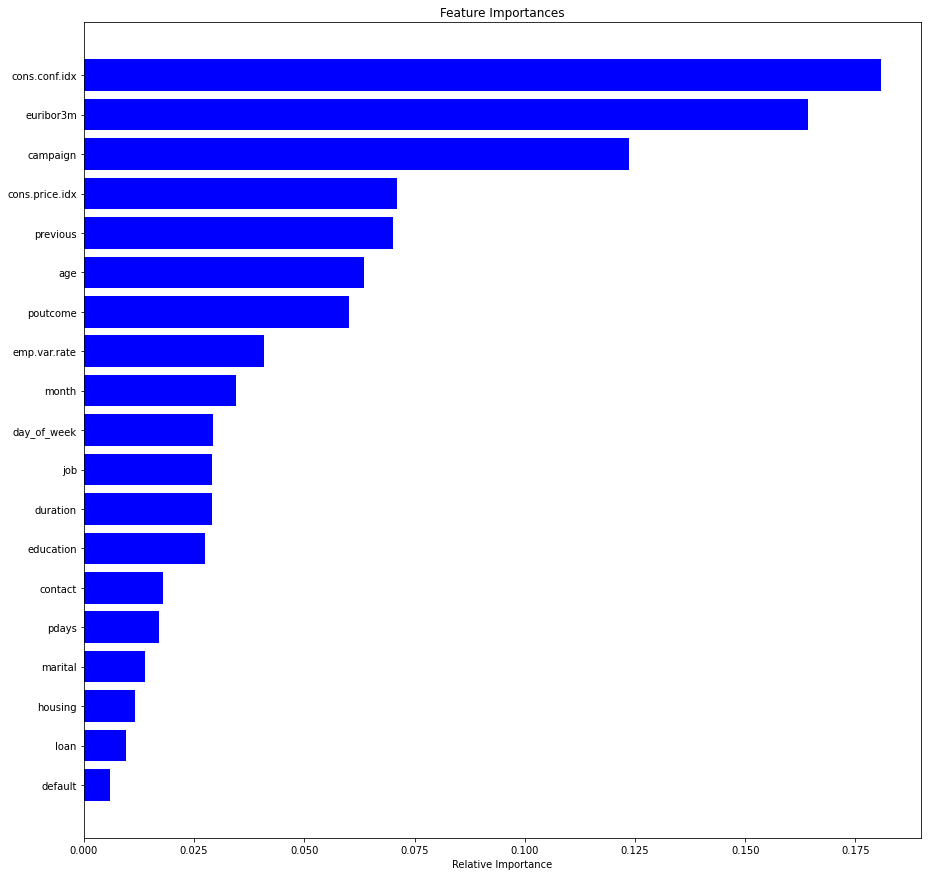

In [52]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize = (15,15))

# get importances from RF
importances = clf.feature_importances_

# then sort them descending
indices = np.argsort(importances)

# get the features from the original data set
features = dataset.columns[0:50]

# plot them with a horizontal bar chart
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [51]:
clf.fit(X_train, y_train).score(X_train, y_train)
y_pred = clf.predict(X_test)

**Generalization error**

In [49]:
from sklearn.metrics import 
y_pred = clf.predict(X_test)
print("Error:" , max_error(y_test,y_pred))

Error: 1
